## Homework 3:
### Sampling Methods

## 1. (20) Show that the Metropolis-Hastings algorithm as described in class and in [1] satisfies detailed balance.

## Metropolis-Hastings algorithm
From Wikipedia, the Metropolis-Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. The sequence can be used to approximate the distribution or to compute an integral. Metropolis-Hastings algorithm is generally used for sampling from multi-dimensional distributions, especially when the number of dimensions is high. 
Metropolis Hastings algorithm is a simple algorithm for producing samples from distributions that may otherwise hard to sample from. The Metropolis Hasting works by simulating a Markov Chain for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. 
The MH algorithms, we need to provide a "transition kernel", Q. A transition kernel is simply a way of moving randomly to a new position in a space
1. Initialise $x_{0}$.
2. For i = 0 to N-1
   - Sample $ u $ ~ $ U_{(0, 1)}$.
   - Sample $ x^{*}$ ~ $ q(x^{*}|x^{<i>})$.
   - If $ u < A(x^{<i>}, x^{*}) = min{(1, \frac{p(x^{<i>}|x^{*})}{p(x^{*}|x^(i))})}.$
     <br>&emsp; $ x^{(i+1)} = x^{*}$
     <br> else
     <br>&emsp; $ x^{(i+1)} = x^{i}$
- q is the "proposal distribution", and must be chosen carefully.
- The metropolis algorithm assumes a symmetric random walk for the proposal distribution, i.e. q(x|y) = q(y|x)
- p(x) does not even have to be the full Bayesian probability, but merely is required to be proportionate to it. This is clear since the Bayes denominators will cancel out.
<br>Reference: M. Stephens, The Metropolis Hastings Algorithm, 23-Apr-2018. [Online]. Available: https://stephens999.github.io/fiveMinuteStats/MH_intro.html. [Accessed: 21-Oct-2020]. 

From Wikipedia, the algorithm proceeds by randomly attempting to move above the sample space, sometimes accepting the moves and sometimes remaining in space. We need to set the criterion for acceptance ratio. If we attempt to move to a point that is more probable then the existing point, we will always accept the move. However, if we attempt to move to a less probable point, we will sometimes reject the move, then we will tend to stay in. Although the Markov chain eventually converges to the desired distribution, the initial samples may follow a very different distribution. As a result, a burn-in period is typically necessary, where an initial number of samples are thrown away. 
The purpose of the Metropolis-Hastings algorithm is to generate a collection of states according to a desired distribution $P(x)$. The algorithm uses a Markov process, which aasymptotically reaches a unique stationar distribution $\pi(x$) such that $\pi(x) =P(x)$

## 2. (20) Let X ∼ N(µ, Σ) where µ = (1, 1) and Σ =$$\begin{bmatrix} 1 & -0.5 \\ -0.5 & 1 \end{bmatrix}$$ Implement a Gibbs sampling algorithm for this 2D Gaussian. Through plots show three runs of your algorithm as 1D histograms in each of the two dimensions overlaid on the plots of the actual marginal distributions. Indicate how many iterations are in each plot and how you determined convergence.

<b>Reflection</b>: Specifically, Gibbs sampling is a special case of the Metropolis-Hasting algorithm. Gibbs sampling  involves a proposal from the the full conditional distribution, which always has a Metropolis-Hastings raio of 1- It means the proposal is always accepted. 
From Wikipedia: Gibbs sampling is a commonly used as a means of statistical inference, especially Bayesian inference. It is a randomized algorithm. It is an alternative to deterministic algorithms for statistical inference such as the expectation-maxization algorithm (EM).

The converge step could be hard to clearly identify. Gibbs sampling continous the process until the sample values have the same distribution as if they were sampled from the true posterior joint distribution.

In [50]:
import numpy as np
from numpy.random import normal      
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.labelsize'] = 22

In [51]:
def GibbsSampler(theta0, y, k, rho):
    """ Gibbs sampler for a bivariate normal
        distribution. """
    
    theta = [theta0]
    for i in range(k):
        theta2 = theta[-1][1] # theta2 from previous iteration
        theta1 = normal(y[0] + rho*(theta2 - y[1]), 1-rho**2)
        theta.append([theta1, theta2])
        theta2 = normal(y[1] + rho*(theta1 - y[0]), 1-rho**2)
        theta.append([theta1, theta2])
        
    return np.array(theta)
        
# for our case put y and rho in
y = [1, 1]
rho = -0.5
k = 500

# Four chains starting from four points of a square
theta0_list = [[-2.5, -2.5], [2.5, -2.5], [-2.5, 2.5], [2.5, 2.5]]
data = []
for theta0 in theta0_list:
    data.append(GibbsSampler(theta0, y, k, rho))

data = np.array(data)
print(np.array(data).shape) 

(4, 1001, 2)


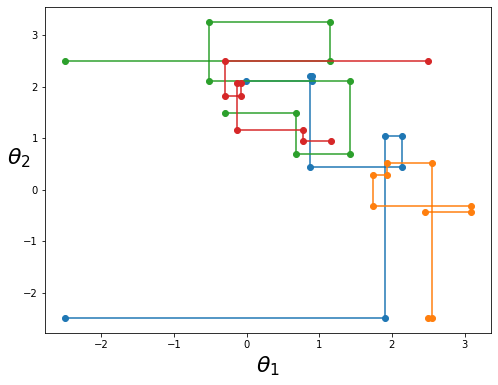

In [65]:
## check steps = 10
nsteps = 10
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

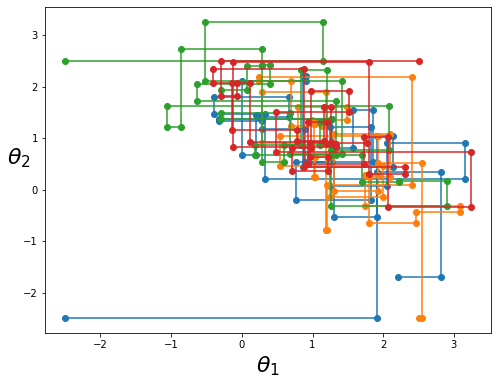

In [62]:
## cgeck step = 50 (you can see graudually convergence)
nsteps = 50
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

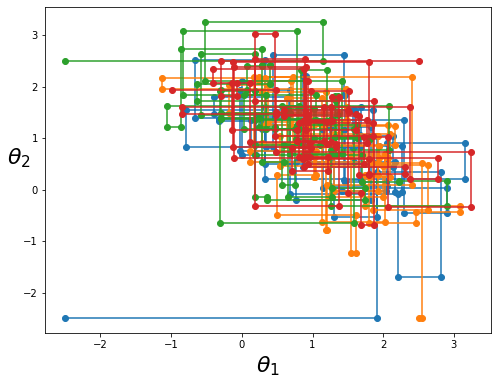

In [63]:
## check steps = 100
nsteps = 100
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

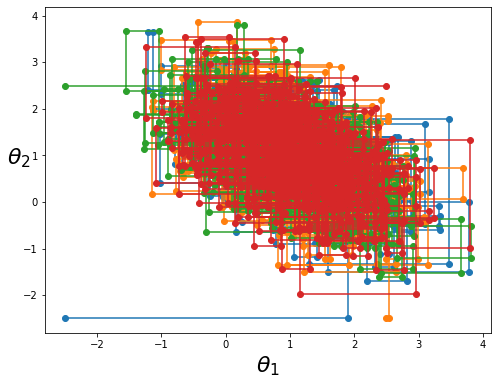

In [53]:
## check the all steps 
for i in range(4):
    plt.plot(data[i, 0:, 0], data[i, 0:, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

In [54]:
data_reduced = data[:, ::2, :]
print(data_reduced.shape) 

(4, 501, 2)


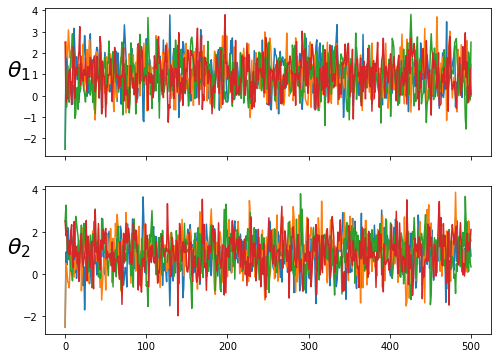

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

for j in range(4):
    ax1.plot(range(k+1), data_reduced[j, :, 0])
    ax2.plot(range(k+1), data_reduced[j, :, 1])

ax1.set_ylabel(r"$\theta_1$", rotation="horizontal")
ax2.set_ylabel(r"$\theta_2$", rotation="horizontal")
plt.show()

<ipython-input-56-351b58b06050>:19: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bin_edges = np.histogram(data_final[:, 0], bins=40, normed=True)
<ipython-input-56-351b58b06050>:27: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bin_edges = np.histogram(data_final[:, 1], bins=40, normed=True)


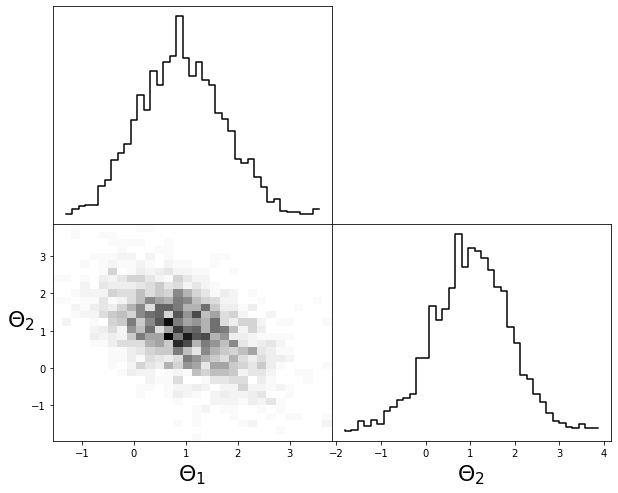

In [56]:
# Generate figure and axes
fig = plt.figure(figsize=(10, 8))
ndim = 2
ax1 = plt.subplot2grid((ndim, ndim), (0, 0))
ax2 = plt.subplot2grid((ndim, ndim), (1, 0))
ax3 = plt.subplot2grid((ndim, ndim), (1, 1))

# Remove labels
ax1.set_xticks([])
ax1.set_yticks([])
ax3.set_yticks([])

# Get the final data
burnin=50
data_burnt = data_reduced[:, burnin:, :] # Burn first 100 points
data_final = data_burnt.reshape(4 * (k-burnin + 1), 2) # Flatten chain data

# Plot the marginal distribution for theta1
hist, bin_edges = np.histogram(data_final[:, 0], bins=40, normed=True)
bin_mids = bin_edges[:-1] + np.diff(bin_edges)
ax1.step(bin_mids, hist, color="k")

# Plot the joint distribution 
ax2.hist2d(data_final[:, 0], data_final[:, 1], bins=30,  cmap=plt.cm.Greys)

# Plot the marginal distribution for theta1
hist, bin_edges = np.histogram(data_final[:, 1], bins=40, normed=True)
bin_mids = bin_edges[:-1] + np.diff(bin_edges)
ax3.step(bin_mids, hist, color="k")


ax2.set_xlabel(r"$\Theta_1$")
ax2.set_ylabel(r"$\Theta_2$", rotation="horizontal", labelpad=10)
ax3.set_xlabel(r"$\Theta_2$")

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

## 3. (20) With the CHD data set (CHDdata.csv ) from the previous homework, develop a sampling based estimate for the posterior distributions of the parameters in a main effects logistic regression model. Use all predictor variables in the data set and standardize all of the numeric, continuous predictors using the mean and standard deviation. For the continuous predictors, use a Gaussian prior with a mean vector of 0 and the identity matrix as the variance-covariance matrix. For the categorical predictors, use either a flat beta or Dirichlet, as appropriate. For results, show plots (either histograms or density plots) of the posterior marginals for each of the regression model parameters.

<b> Reflection </b>: chd  dataset contains numerical predictors and one category predictors (family history). The learning from Professor's Baysian Model Averageing notebook is really helpful - allow us to understand the probability of each predictors, good model/next model/current model. I used simple model to get posterior marginals after running BMA - I got to know some predictors are not statistical significant. 

<b>Approches</b>:
<br>First: I start with Professor's kaggle notebook -Bayesian Model Averaging Logistic Regression (https://www.kaggle.com/billbasener/bayesian-model-averaging-logistic-regression ) - I would like to know which predictors are statistical significant, this will help me to do model selections (full model vs. simple model)

In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\gladi\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pymc3 as pm
from pymc3 import Model, Normal, Slice
from pymc3 import sample
from pymc3 import traceplot
from pymc3.distributions import Interpolated
from theano import as_op
import theano.tensor as tt
import numpy as np
from scipy import stats

plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.9.3


In [3]:
import pandas as pd

In [4]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations

In [6]:
df = pd.read_csv('CHDdata.csv')
df

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11  Present     49    25.30    97.20   52   
1    144     0.01   4.41      28.61   Absent     55    28.87     2.06   63   
2    118     0.08   3.48      32.28  Present     52    29.14     3.81   46   
3    170     7.50   6.41      38.03  Present     51    31.99    24.26   58   
4    134    13.60   3.50      27.78  Present     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72   Absent     64    28.45     0.00   58   
458  182     4.20   4.41      32.10   Absent     52    28.61    18.72   52   
459  108     3.00   1.59      15.23   Absent     40    20.09    26.64   55   
460  118     5.40  11.61      30.79   Absent     64    27.35    23.97   40   
461  132     0.00   4.82      33.41  Present     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

Load the data adn check the head

In [8]:
df["famhist"] = (df["famhist"] == "Present")*1 # converts the famhit to 0 (no hist) and 1 (has hist)
#df = df.drop(["famhist"], axis=1)
df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11        1     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61        0     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28        1     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03        1     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78        1     60    25.99    57.34   49    1

In [9]:
X = df.drop(["chd"], axis=1)
y = df["chd"]
# building the model and fitting the data 
log_reg = sm.Logit(y, add_constant(X)).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Fri, 23 Oct 2020   Pseudo R-squ.:                  0.2080
Time:                        11:59:04   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp            0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco        0.0794      0.027      2.984      0.003       0.027       0.132
ldl            0.1739      0.060      2.915      0.004       0.057       0.291
adiposity      0.0186      0.029      0.635      0.526      -0.039       0.076
famhist        0.9254      0.228      4.061      0.000       0.479       1.372
typea          0.0396      0.012      3.214      0.001       0.015       0.064
obesity       -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol        0.0001      0.004      0.027      0.978      -0.009       0.009
age            0.0452      0.012      3.728      0.000       0.021       0.069
==============================================================================
"""

## Bayesian Model Averaging

In [10]:
from mpmath import mp
mp.dps = 50
class BMA:
    
    def __init__(self, y, X, **kwargs):
        # Setup the basic variables.
        self.y = y
        self.X = X
        self.names = list(X.columns)
        self.nRows, self.nCols = np.shape(X)
        self.likelihoods = mp.zeros(self.nCols,1)
        self.likelihoods_all = {}
        self.coefficients_mp = mp.zeros(self.nCols,1)
        self.coefficients = np.zeros(self.nCols)
        self.probabilities = np.zeros(self.nCols)
        # Check the max model size. (Max number of predictor variables to use in a model.)
        # This can be used to reduce the runtime but not doing an exhaustive sampling.
        if 'MaxVars' in kwargs.keys():
            self.MaxVars = kwargs['MaxVars']
        else:
            self.MaxVars = self.nCols  
        # Prepare the priors if they are provided.
        # The priors are provided for the individual regressor variables.
        # The prior for a model is the product of the priors on the variables in the model.
        if 'Priors' in kwargs.keys():
            if np.size(kwargs['Priors']) == self.nCols:
                self.Priors = kwargs['Priors']
            else:
                print("WARNING: Provided priors error.  Using equal priors instead.")
                print("The priors should be a numpy array of length equal tot he number of regressor variables.")
                self.Priors = np.ones(self.nCols)  
        else:
            self.Priors = np.ones(self.nCols)  
        if 'Verbose' in kwargs.keys():
            self.Verbose = kwargs['Verbose'] 
        else:
            self.Verbose = False 
        if 'RegType' in kwargs.keys():
            self.RegType = kwargs['RegType'] 
        else:
            self.RegType = 'LS' 
        
    def fit(self):
        # Perform the Bayesian Model Averaging
        
        # Initialize the sum of the likelihoods for all the models to zero.  
        # This will be the 'normalization' denominator in Bayes Theorem.
        likelighood_sum = 0
        
        # To facilitate iterating through all possible models, we start by iterating thorugh
        # the number of elements in the model.  
        max_likelihood = 0
        for num_elements in range(1,self.MaxVars+1): 
            
            if self.Verbose == True:
                print("Computing BMA for models of size: ", num_elements)
            
            # Make a list of all index sets of models of this size.
            Models_next = list(combinations(list(range(self.nCols)), num_elements)) 
             
            # Occam's window - compute the candidate models to use for the next iteration
            # Models_previous: the set of models from the previous iteration that satisfy (likelihhod > max_likelihhod/20)
            # Models_next:     the set of candidate models for the next iteration
            # Models_current:  the set of models from Models_next that can be consturcted by adding one new variable
            #                    to a model from Models_previous
            if num_elements == 1:
                Models_current = Models_next
                Models_previous = []
            else:
                idx_keep = np.zeros(len(Models_next))
                for M_new,idx in zip(Models_next,range(len(Models_next))):
                    for M_good in Models_previous:
                        if(all(x in M_new for x in M_good)):
                            idx_keep[idx] = 1
                            break
                        else:
                            pass
                Models_current = np.asarray(Models_next)[np.where(idx_keep==1)].tolist()
                Models_previous = []
                        
            
            # Iterate through all possible models of the given size.
            for model_index_set in Models_current:
                
                # Compute the linear regression for this given model. 
                model_X = self.X.iloc[:,list(model_index_set)]
                if self.RegType == 'Logit':
                    model_regr = sm.Logit(self.y, model_X).fit(disp=0)
                else:
                    model_regr = OLS(self.y, model_X).fit()
                
                # Compute the likelihood (times the prior) for the model. 
                model_likelihood = mp.exp(-model_regr.bic/2)*np.prod(self.Priors[list(model_index_set)])
                    
                if (model_likelihood > max_likelihood/20):
                    if self.Verbose == True:
                        print("Model Variables:",model_index_set,"likelihood=",model_likelihood)
                    self.likelihoods_all[str(model_index_set)] = model_likelihood
                    
                    # Add this likelihood to the running tally of likelihoods.
                    likelighood_sum = mp.fadd(likelighood_sum, model_likelihood)

                    # Add this likelihood (times the priors) to the running tally
                    # of likelihoods for each variable in the model.
                    for idx, i in zip(model_index_set, range(num_elements)):
                        self.likelihoods[idx] = mp.fadd(self.likelihoods[idx], model_likelihood, prec=1000)
                        self.coefficients_mp[idx] = mp.fadd(self.coefficients_mp[idx], model_regr.params[i]*model_likelihood, prec=1000)
                    Models_previous.append(model_index_set) # add this model to the list of good models
                    max_likelihood = np.max([max_likelihood,model_likelihood]) # get the new max likelihood if it is this model
                else:
                    if self.Verbose == True:
                        print("Model Variables:",model_index_set,"rejected by Occam's window")
                    

        # Divide by the denominator in Bayes theorem to normalize the probabilities 
        # sum to one.
        self.likelighood_sum = likelighood_sum
        for idx in range(self.nCols):
            self.probabilities[idx] = mp.fdiv(self.likelihoods[idx],likelighood_sum, prec=1000)
            self.coefficients[idx] = mp.fdiv(self.coefficients_mp[idx],likelighood_sum, prec=1000)
        
        # Return the new BMA object as an output.
        return self
    
    def predict(self, data):
        data = np.asarray(data)
        if self.RegType == 'Logit':
            try:
                result = 1/(1+np.exp(-1*np.dot(self.coefficients,data)))
            except:
                result = 1/(1+np.exp(-1*np.dot(self.coefficients,data.T)))
        else:
            try:
                result = np.dot(self.coefficients,data)
            except:
                result = np.dot(self.coefficients,data.T)
        
        return result  
        
    def summary(self):
        # Return the BMA results as a data frame for easy viewing.
        df = pd.DataFrame([self.names, list(self.probabilities), list(self.coefficients)], 
             ["Variable Name", "Probability", "Avg. Coefficient"]).T
        return df  

In [11]:
result = BMA(y,add_constant(X), RegType = 'Logit', Verbose=True).fit()

Computing BMA for models of size:  1
Model Variables: (0,) likelihood= 1.6764102335645664532888791099307451474533902752729e-131
Model Variables: (1,) rejected by Occam's window
Model Variables: (2,) rejected by Occam's window
Model Variables: (3,) rejected by Occam's window
Model Variables: (4,) rejected by Occam's window
Model Variables: (5,) rejected by Occam's window
Model Variables: (6,) rejected by Occam's window
Model Variables: (7,) likelihood= 1.1464455128442806768198208070714121692330734959133e-132
Model Variables: (8,) rejected by Occam's window
Model Variables: (9,) rejected by Occam's window
Computing BMA for models of size:  2
Model Variables: [0, 1] likelihood= 3.4444089502041833448791010659055678957873780955378e-129
Model Variables: [0, 2] likelihood= 7.8558801053145200455561371696708113598483547330823e-124
Model Variables: [0, 3] rejected by Occam's window
Model Variables: [0, 4] rejected by Occam's window
Model Variables: [0, 5] rejected by Occam's window
Model Variabl

In [12]:
result.summary() ##  adiposity, obesity, alcohol are not statistical significant

Variable Name Probability Avg. Coefficient
0         const           1          -6.1127
1           sbp   0.0569565      0.000336024
2       tobacco    0.910225        0.0735926
3           ldl    0.833053         0.137145
4     adiposity   0.0283248     -0.000267513
5       famhist    0.998919         0.913329
6         typea    0.886594        0.0331735
7       obesity   0.0588813      -0.00221377
8       alcohol           0                0
9           age           1        0.0514433

In [13]:
result.likelihoods_all

{'(0,)': mpf('1.6764102335645664532888791099307451474533902752729417e-131'),
 '(7,)': mpf('1.146445512844280676819820807071412169233073495913314e-132'),
 '[0, 1]': mpf('3.4444089502041833448791010659055678957873780955377789e-129'),
 '[0, 2]': mpf('7.8558801053145200455561371696708113598483547330823463e-124'),
 '[0, 9]': mpf('1.6253490931655119684986769518658637546980939526697636e-117'),
 '[0, 1, 9]': mpf('1.3275414219044666920370459907363419417597103078934094e-118'),
 '[0, 2, 5]': mpf('1.2383108178701516212887392067651433267689657998342768e-118'),
 '[0, 2, 9]': mpf('1.2259928160939787764607775795744252962621006285181762e-116'),
 '[0, 3, 9]': mpf('5.2434159176293495654362746585168729037351662007347339e-116'),
 '[0, 5, 9]': mpf('9.6297916807520603269745697992121789168188145374368945e-115'),
 '[0, 1, 5, 9]': mpf('9.0855212860049926113666620825941860093722418653510362e-116'),
 '[0, 2, 3, 9]': mpf('3.0459561269781679208780244256138681010450926135390397e-115'),
 '[0, 2, 5, 9]': mpf('1.256444

## The model
I will use simple model instead of full model after I ran BMA (Thanks for professor's codes). I will use PyMc3 do inference.
In Bayesian statistics, we treat everything as a random variables and we would like to knoe the posterior probability distribution of the paramters (i.e. regression coefficients) The posterior is equal to the likelihood.

&emsp; $ p(\theta|D) =\frac{p(D|\theta)p(\theta)}{p(D)}$
The likelihood is the product of n Bernoulli trials
&emsp; $ z_i =\beta_0 + \beta_1(sbp)_i + \beta_2(tobacco)_i+\beta_4(ldl) + \beta_5(famhist) + \beta_6(typea) + \beta_7(age) $
and $ y_i $ = 1 if chd = 1 and $y_i$ = 0 if chd = 0
<br>Here I use PyMC3 to draw samples from the posterior. The sampling algorithm used is NUTS, which is form of Hamiltonian Monte Carlo. I use a convenience function from above to plot the traceinformation fro the first 500 parameters

In [14]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('df.chd ~ df.sbp + df.tobacco + df.ldl + df.famhist + df.typea + df.age',
                            df,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(500, tune=500, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [df.age, df.typea, df.famhist, df.ldl, df.tobacco, df.sbp, Intercept]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 5617 seconds.
The acceptance probability does not match the target. It is 0.8836143836244855, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8851750366562253, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\gladi\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BCB650850>,
      dtype=object)

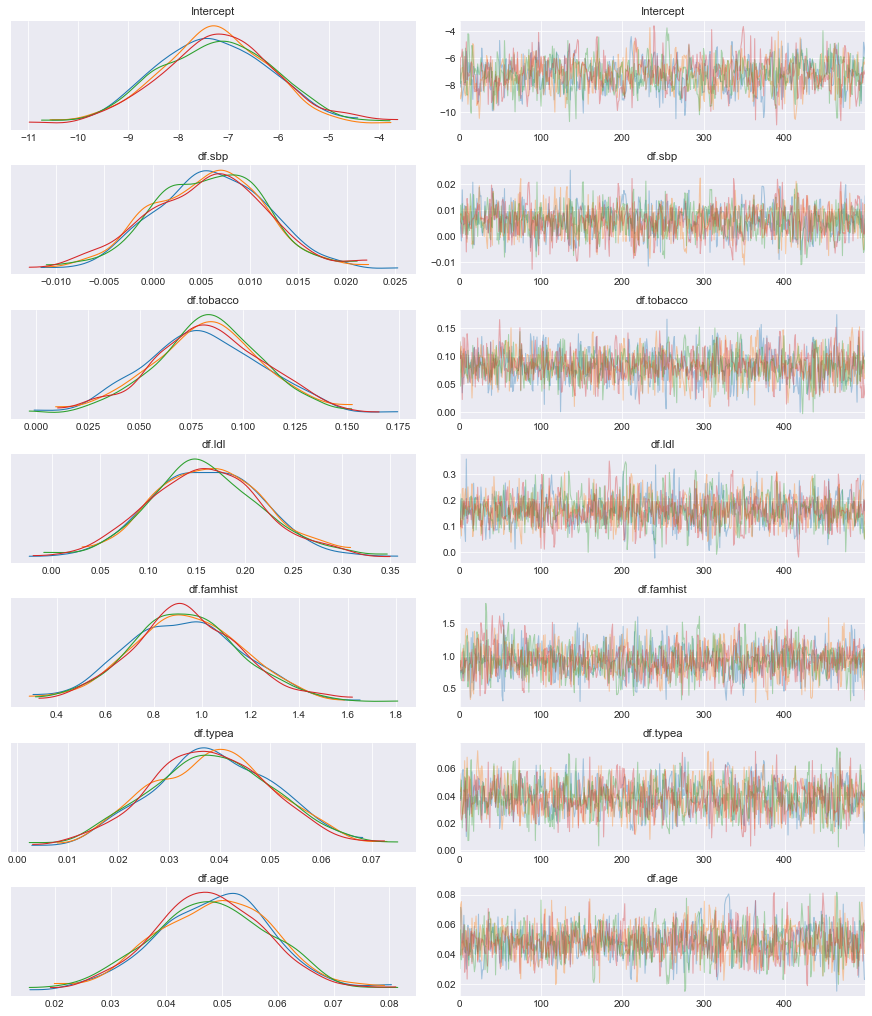

In [16]:
az.plot_trace(trace)

## 4. (20) Expand problem 3 to consider two other models with fewer predictor variables or with nonlinear transformations of one or more of the the predictor variables. Use WAIC to recommend which of these models to use.

## Lets generate the model with nolinear transformation - I use age. 

In [63]:
def run_models(chd, upper_order=5):
    '''
    Fit a range of pymc3 models of increasing polynomial complexity.
    I chose age as an example
    '''

    models, traces = OrderedDict(), OrderedDict()

    for k in range(1,upper_order+1):

        nm = 'k{}'.format(k)
        fml = create_poly_modelspec(k)

        with pm.Model() as models[nm]:

            print('\nRunning: {}'.format(nm))
            pm.glm.GLM.from_formula(fml, df,
                                    family=pm.glm.families.Binomial())

            traces[nm] = pm.sample(1000, tune=1000, init='adapt_diag')

    return models, traces

def create_poly_modelspec(k=1):
    '''
    Generating function:
    Create a polynomial modelspec string for patsy
    '''
    return ('chd ~ sbp + tobacco + ldl + alcohol' + ' '.join(['+ np.power(age,{})'.format(j)
                                     for j in range(2,k+1)])).strip()

models_lin, traces_lin = run_models(chd, 3)

Auto-assigning NUTS sampler...



Running: k1


Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alcohol, ldl, tobacco, sbp, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4409 seconds.
The acceptance probability does not match the target. It is 0.893349511988057, but should be close to 0.8. Try to increase the number of tuning steps.



Running: k2


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [np.power(age, 2), alcohol, ldl, tobacco, sbp, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5632 seconds.



Running: k3


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [np.power(age, 3), np.power(age, 2), alcohol, ldl, tobacco, sbp, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9798 seconds.


In [65]:
model_trace_dict = dict()
for nm in ['k1', 'k2', 'k3']:
    models_lin[nm].name = nm
    model_trace_dict.update({models_lin[nm]: traces_lin[nm]})
dfwaic = pm.compare(model_trace_dict, ic='WAIC')
dfwaic

rank     waic   p_waic  \
<pymc3.model.Model object at 0x000002C338B8A220>    0 -257.976  7.24206   
<pymc3.model.Model object at 0x000002C3394B6280>    1 -258.621  6.39632   
<pymc3.model.Model object at 0x000002C333DCB0A0>    2 -268.262  5.60532   

                                                   d_waic     weight       se  \
<pymc3.model.Model object at 0x000002C338B8A220>        0   0.608794  9.77123   
<pymc3.model.Model object at 0x000002C3394B6280>  0.64531   0.380307  10.1446   
<pymc3.model.Model object at 0x000002C333DCB0A0>  10.2865  0.0108992  10.1677   

                                                      dse warning waic_scale  
<pymc3.model.Model object at 0x000002C338B8A220>        0   False        log  
<pymc3.model.Model object at 0x000002C3394B6280>   1.7233   False        log  
<pymc3.model.Model object at 0x000002C333DCB0A0>  4.64184   False        log

## 5. (20) With the data set bangladesh.csv, develop a pooled, a no-pooled, and a hierarchical model for all districts to predict contraception usage. Do not use any other predictor variable besides district. Plot each of these predictions with district labels on one axis and the expected proportion of women using contraception on the other. Explain these results.

<b>Reflection</b>: 
We need to understand the differences between no-pooled, hierarchical model. 
The reason why we would like to think about the moment to use each model, because some variable are dependent on each other. When we group them properly. We can get more insightful outcome
I will use lecture example -randon case.
A pooled model: we index county, we can see each county distribution.
A no-pooled model: i.e. if we don't index county - the result is not informative. If the predictors are dependent to each other, we can think about Hierachical model to group them toghether. We can get the outcome which is more convergent and shrikaged result. 

I would like to use logistic regression 
I would like to consider this is like <b>"dice example" </b> with Yes or No
In this case, the dice number is <b>district number</b>
[1, 2, 3, 4, 5......... 60] Therefore, I will use Bernoilli approach (coin- head/tail)

## First of all, the dataset showing some interesting features, such as district, urban, children number for 1934 women. And response variable y - used contraception

## No pooling, I would treat each district under the same condition - no sub grouping. Hierarchical model, I would think about possible index which is relevent to district -urban. I use urban for this case

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import xarray as xr
import warnings

from theano import tensor as tt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\gladi\anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [3]:
df = pd.read_csv("bangladesh.csv")

In [4]:
df

woman  district  use.contraception  living.children  age.centered  urban
0         1         1                  0                4       18.4400      1
1         2         1                  0                1       -5.5599      1
2         3         1                  0                3        1.4400      1
3         4         1                  0                4        8.4400      1
4         5         1                  0                1      -13.5590      1
...     ...       ...                ...              ...           ...    ...
1929   1930        61                  0                4       14.4400      0
1930   1931        61                  0                3       -4.5599      0
1931   1932        61                  0                4       14.4400      0
1932   1933        61                  0                1      -13.5600      0
1933   1934        61                  0                4       10.4400      0

[1934 rows x 6 columns]

## Rename some columns

In [5]:
## rename column
df = df.rename(columns = {"use.contraception" : "use_contraception"})
df = df.rename(columns = {"living.children" : "living_children"}) 

In [6]:
## district
df.district

0        1
1        1
2        1
3        1
4        1
        ..
1929    61
1930    61
1931    61
1932    61
1933    61
Name: district, Length: 1934, dtype: int64

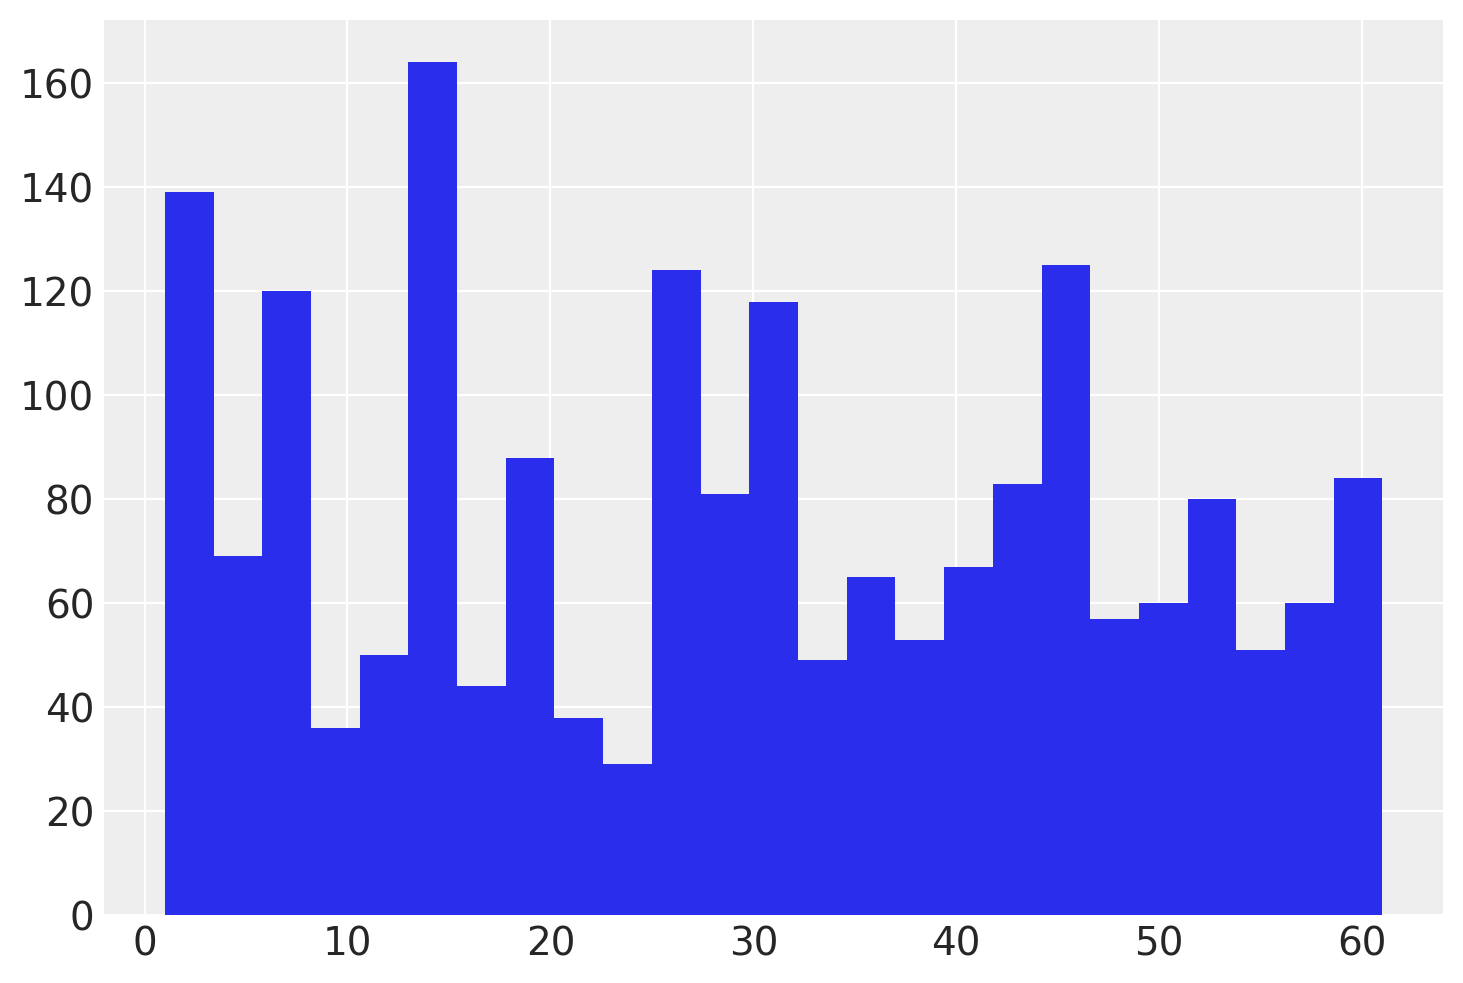

In [7]:
df["district"].hist(bins=25)

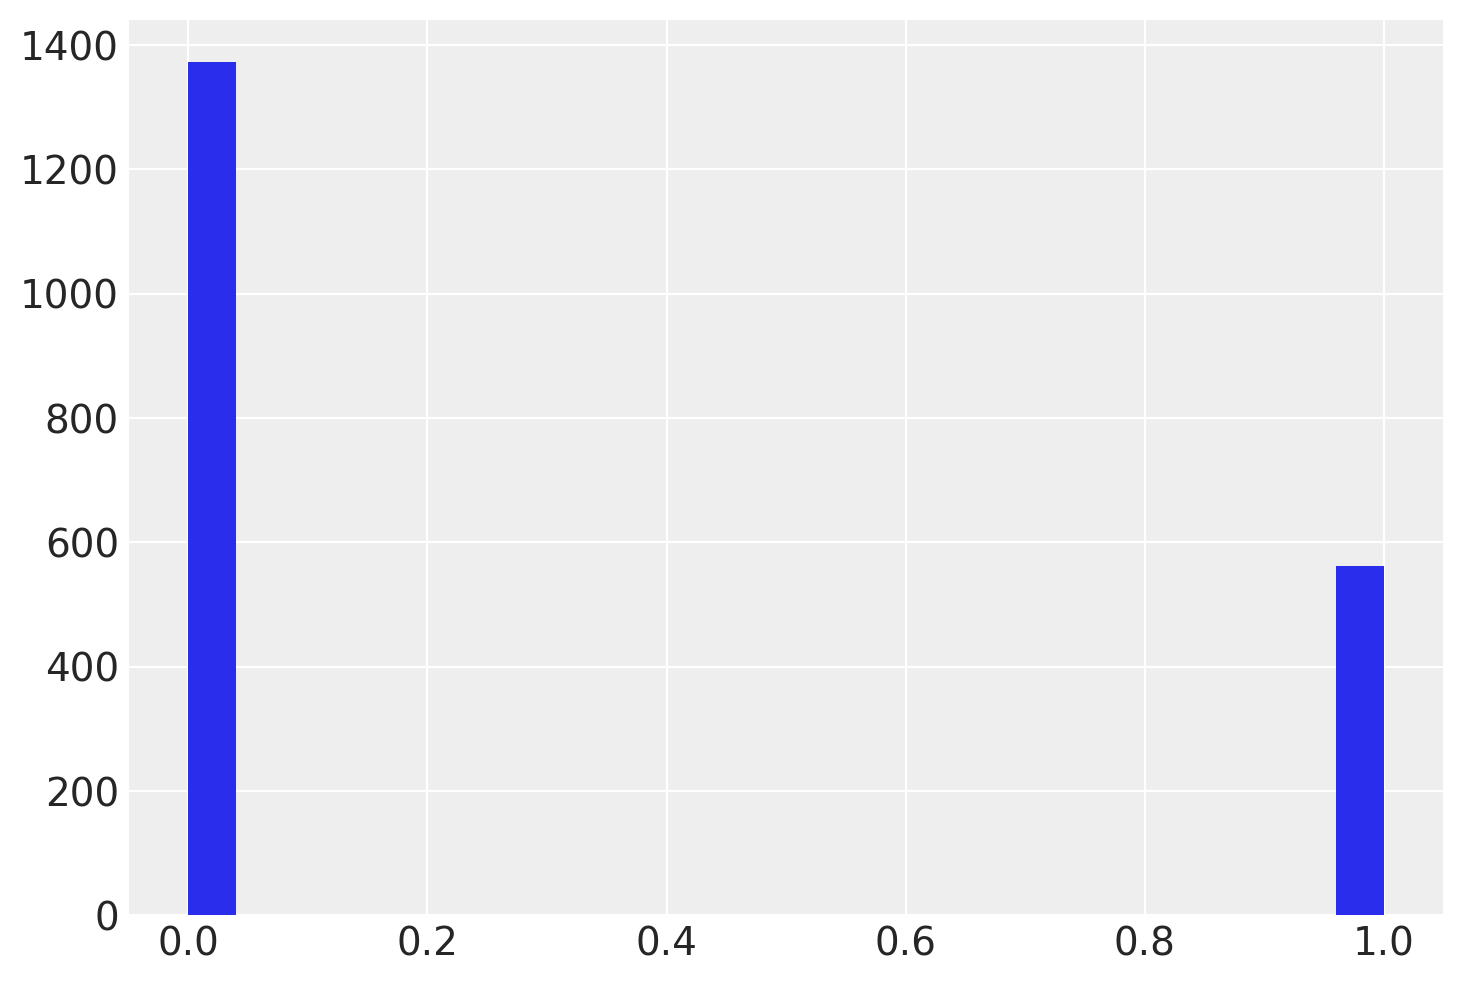

In [8]:
df["urban"].hist(bins=25)

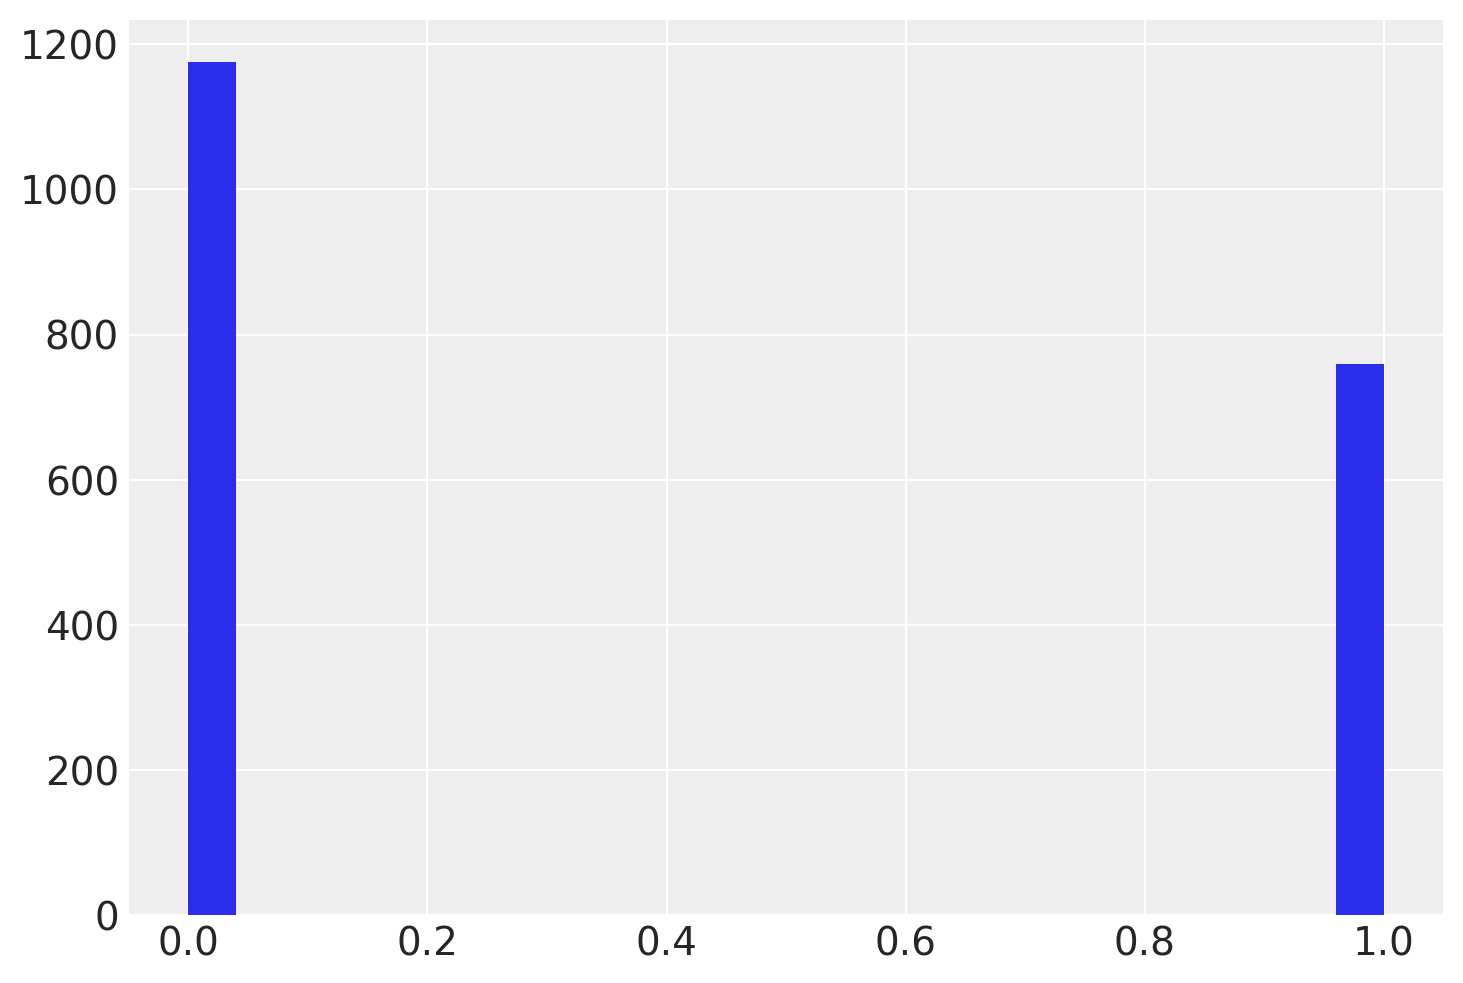

In [9]:
df["use_contraception"].hist(bins=25)

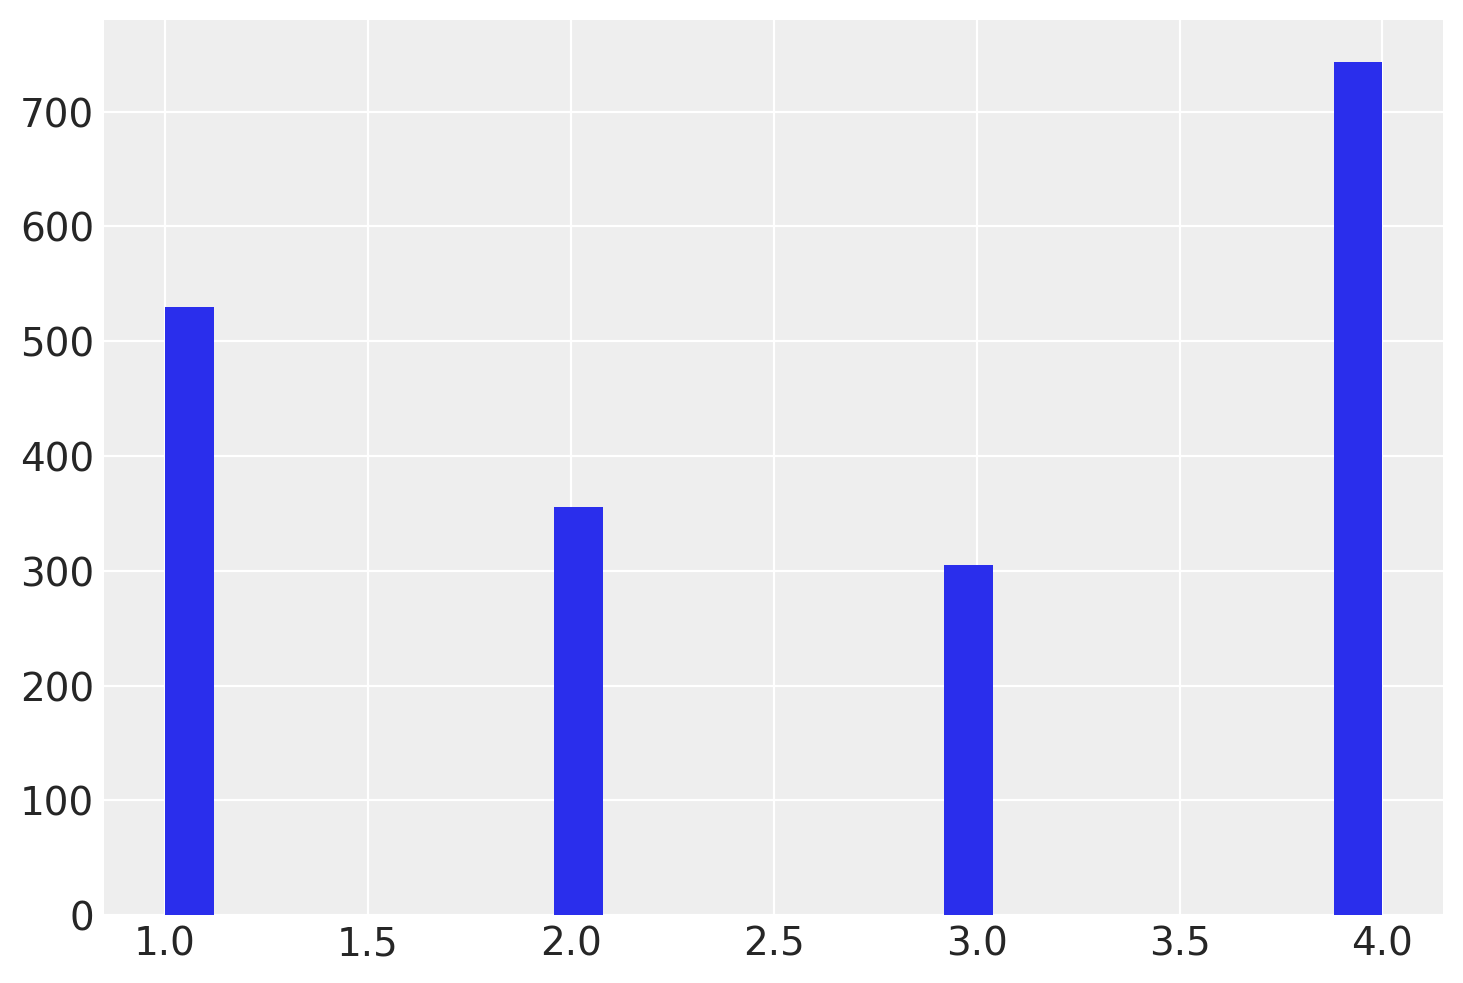

In [10]:
df["living_children"].hist(bins=25)

In [11]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

In [12]:
df[['district', 'living_children', 'use_contraception', 'urban']].head()

district  living_children  use_contraception  urban
0         1                4                  0      1
1         1                1                  0      1
2         1                3                  0      1
3         1                4                  0      1
4         1                1                  0      1

In [13]:
## Lets narrow down 61 district to 6 district
bins= [ 0, 10, 20, 30, 40, 50, 70]
labels = [1, 2, 3, 4, 5, 6,]
df["district"] =pd.cut(df['district'], bins = bins, labels = labels)

In [14]:
df.dtypes

woman                   int64
district             category
use_contraception       int64
living_children         int64
age.centered          float64
urban                   int64
dtype: object

## Basic model

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [df.district[T.6], df.district[T.5], df.district[T.4], df.district[T.3], df.district[T.2], Intercept]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 1914 seconds.
The acceptance probability does not match the target. It is 0.936564430654617, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9335451434691993, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9293985527854827, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.930828786995554, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\gladi\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful

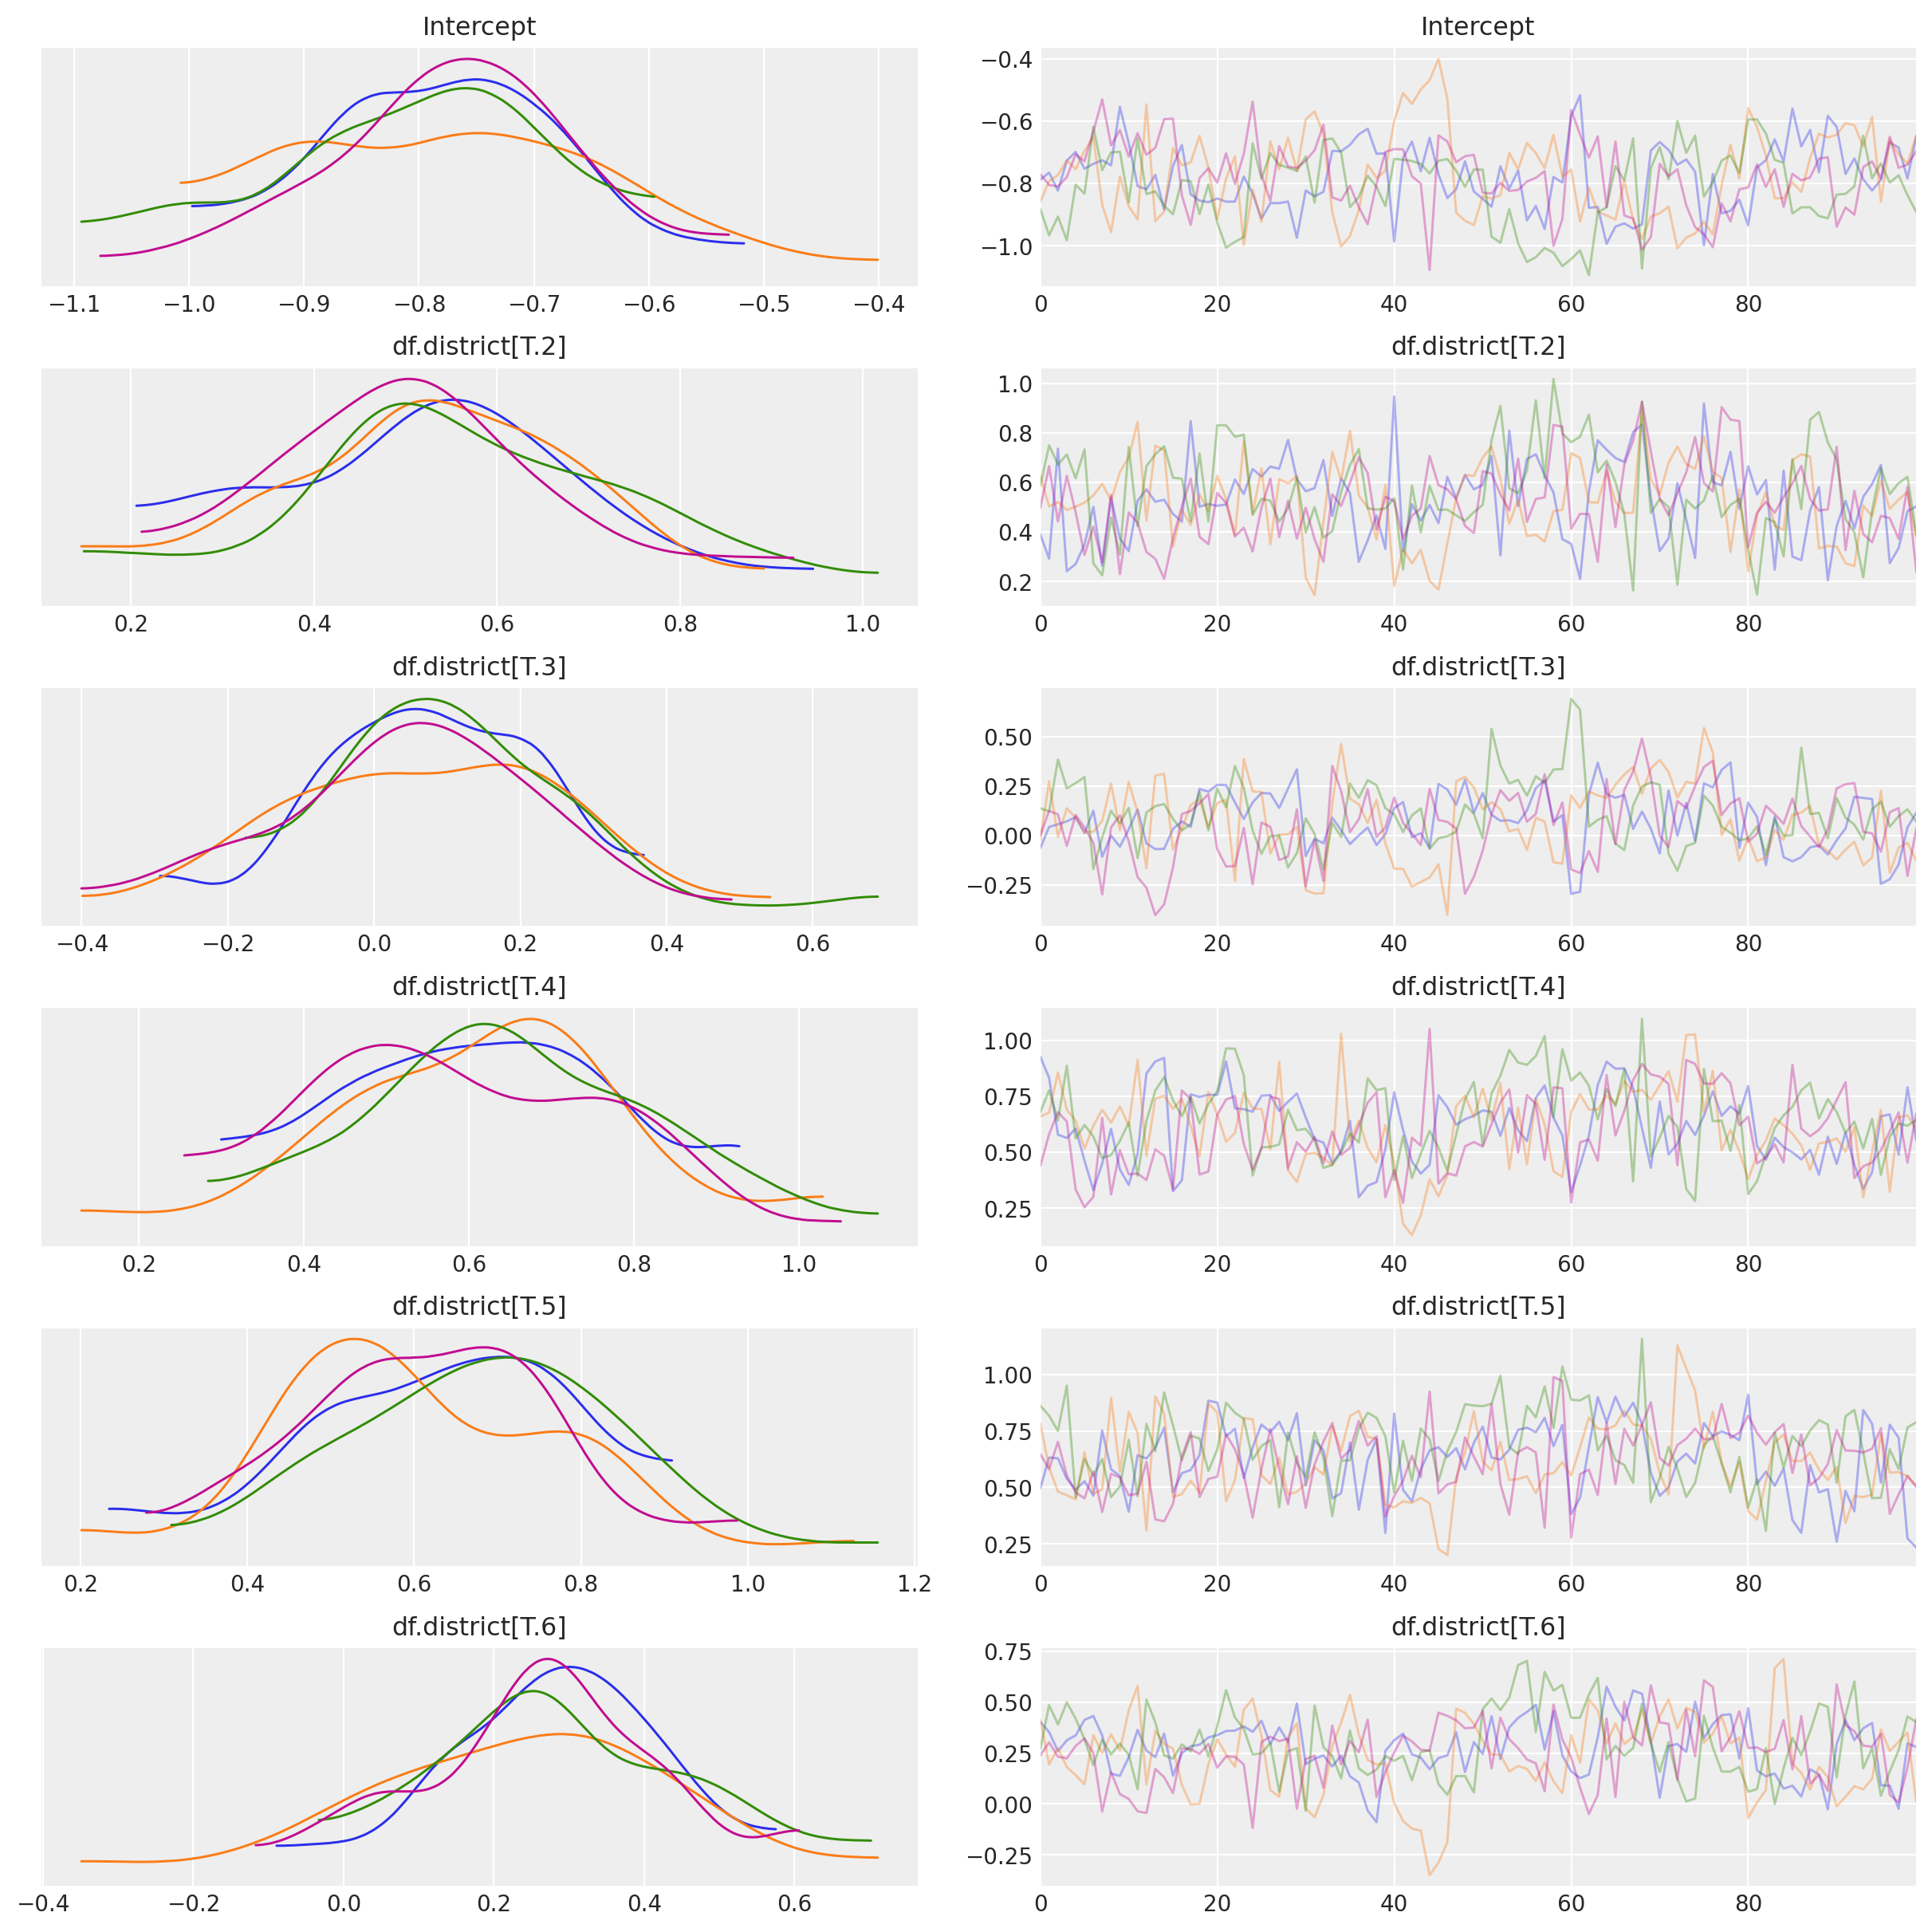

In [15]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('df.use_contraception ~ df.district', df, family = pm.glm.families.Binomial())
    trace = pm.sample(100, tune = 100, init = 'adapt_diag')
    
az.plot_trace(trace);

## Hierarchical model

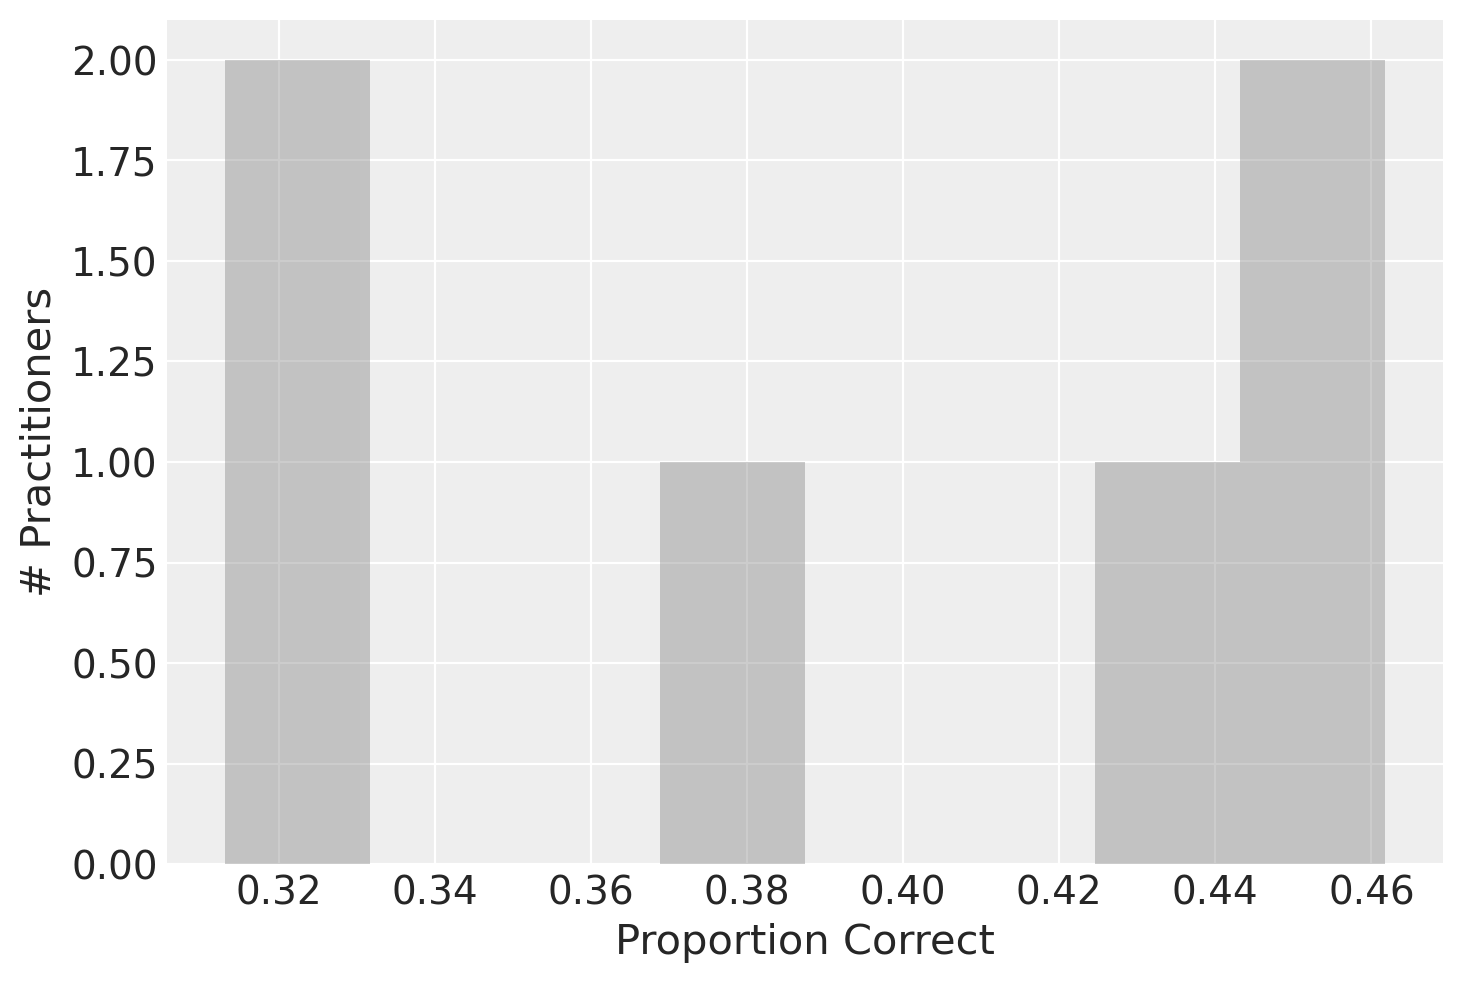

In [15]:
import seaborn as sns
df_proportions = df.groupby('district')['use_contraception'].apply(lambda x: x.sum()/len(x))

ax = sns.distplot(df_proportions, bins=8, kde=False, color='gray')
ax.set(xlabel='Proportion Correct', ylabel='# Practitioners')
sns.despine(ax=ax);

In [16]:
practitioner_idx = df.district.cat.codes.values
practitioner_codes = df.district.cat.categories
n_practitioners = practitioner_codes.size

with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 0.01, 0.01)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_practitioners)
        
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.use_contraception)    

In [17]:
with hierarchical_model:
    trace = pm.sample(1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, kappa_minus2, omega]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2880 seconds.
There were 833 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.648820114770059, but should be close to 0.8. Try to increase the number of tuning steps.
There were 857 divergences after tuning. Increase `target_accept` or reparameterize.
There were 952 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6715250188943777, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\gladi\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


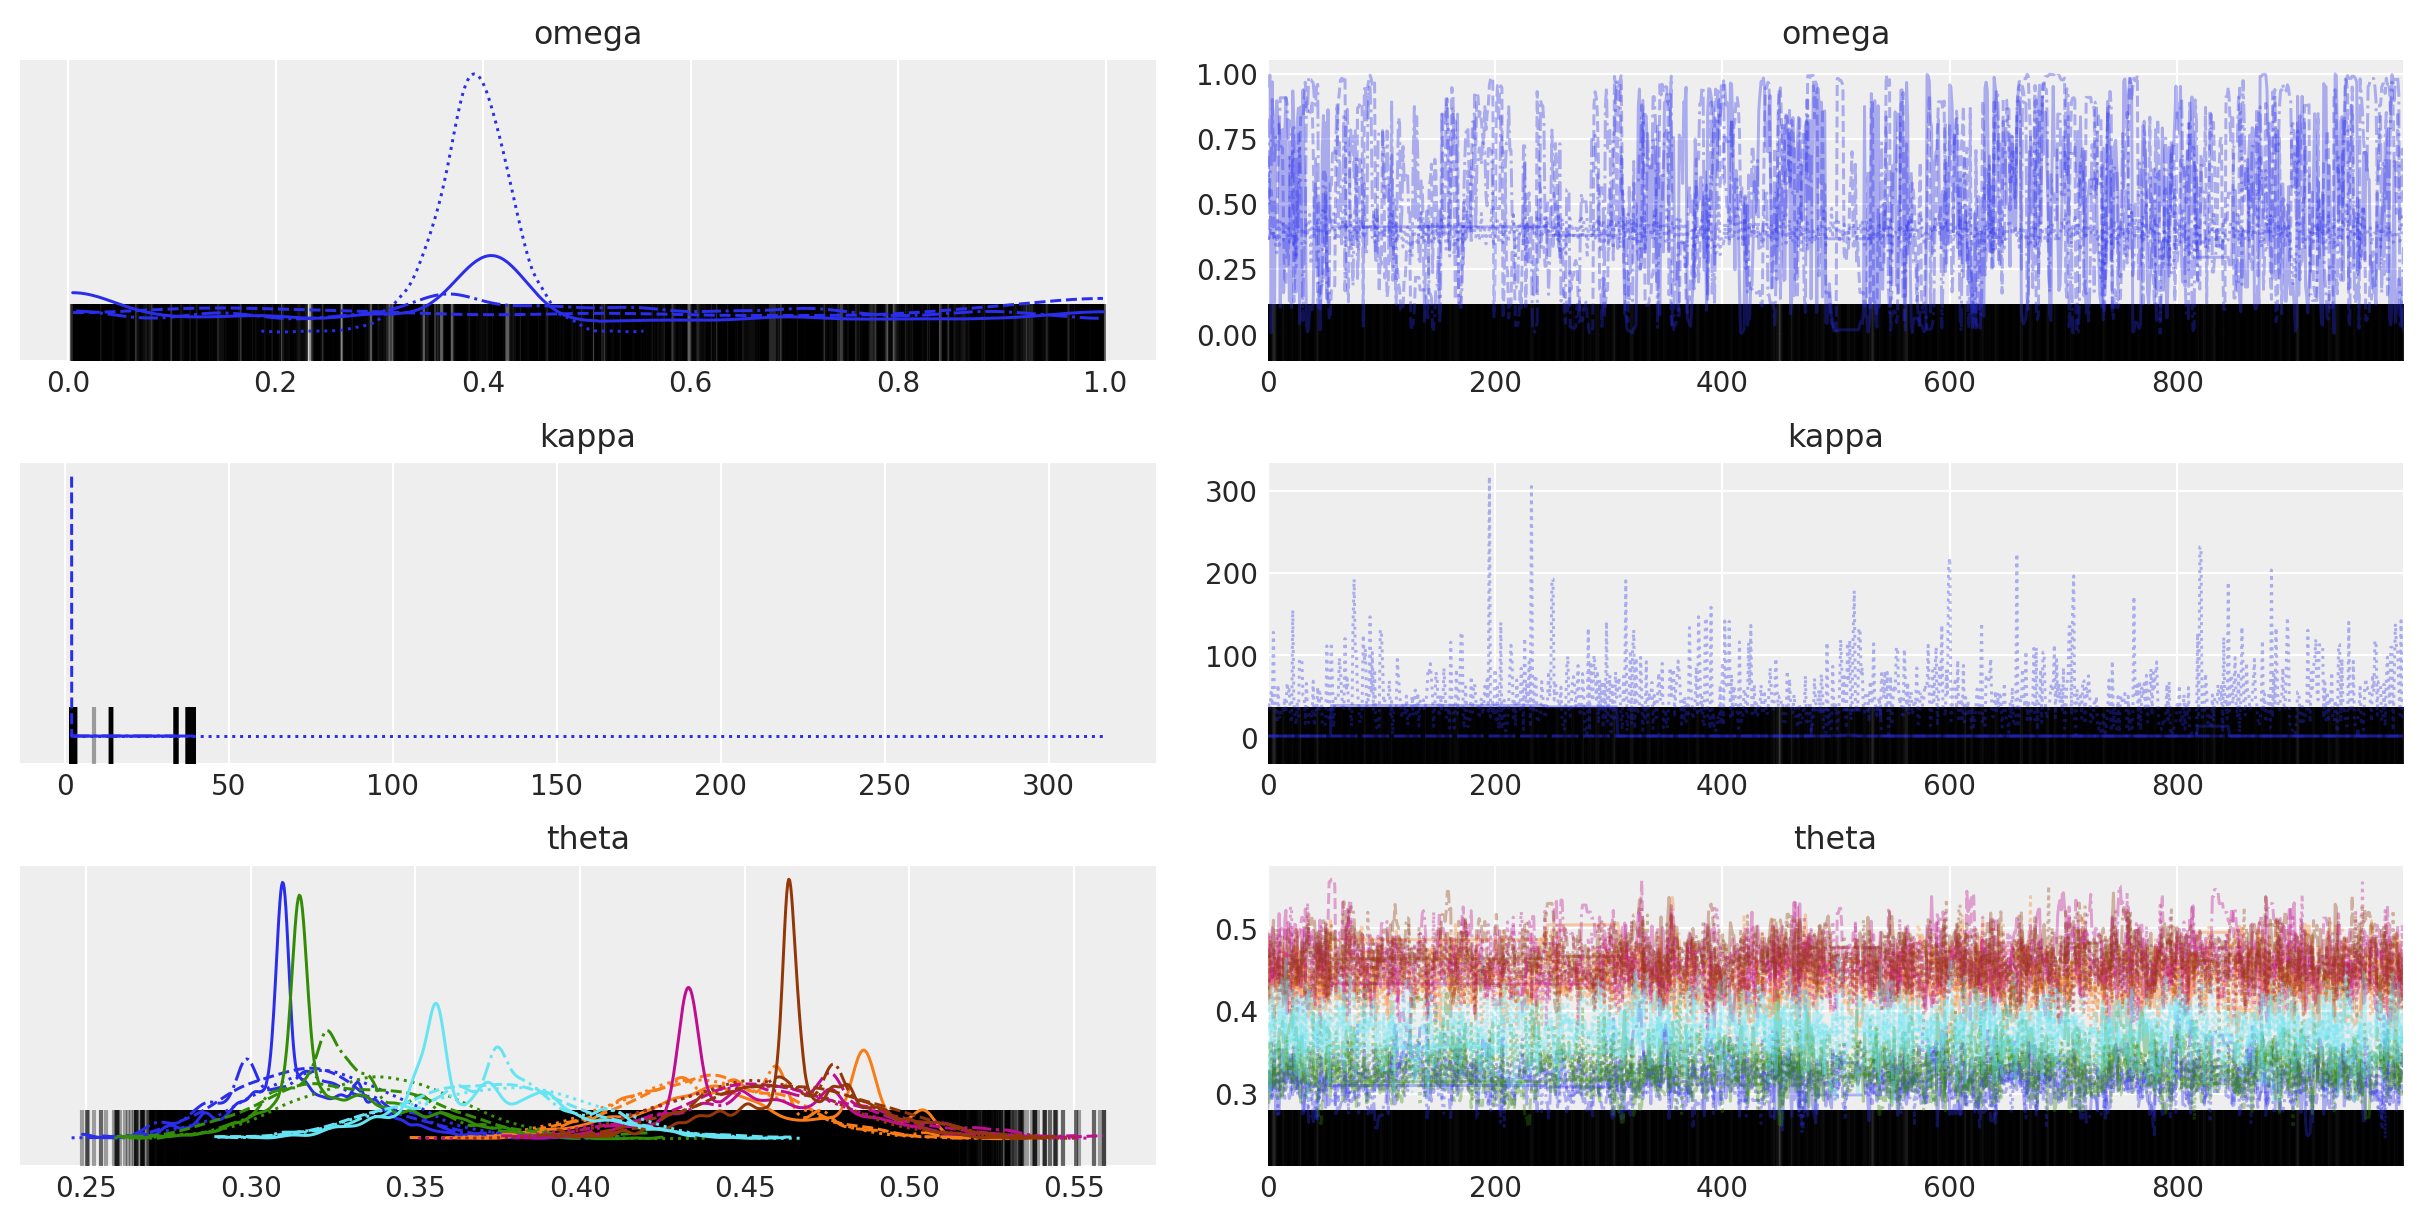

In [18]:
pm.traceplot(trace, ['omega','kappa', 'theta']);

In [19]:
pm.summary(trace)

C:\Users\gladi\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
omega          0.464   0.250   0.078    0.998      0.014    0.019     337.0   
kappa_minus2  15.188  29.060   0.000   65.829     10.263    7.539       8.0   
kappa         17.188  29.060   2.000   67.829     10.263    7.539       8.0   
theta[0]       0.317   0.022   0.274    0.358      0.001    0.001     579.0   
theta[1]       0.442   0.028   0.385    0.488      0.004    0.003      55.0   
theta[2]       0.331   0.025   0.289    0.380      0.001    0.001     449.0   
theta[3]       0.457   0.029   0.403    0.513      0.002    0.001     343.0   
theta[4]       0.461   0.026   0.412    0.509      0.001    0.001     295.0   
theta[5]       0.372   0.027   0.322    0.423      0.001    0.001     612.0   

              ess_sd  ess_bulk  ess_tail  r_hat  
omega           91.0     526.0     427.0   1.26  
kappa_minus2     8.0       8.0      30.0   1.48  
kappa            8.0       7.0      12.0   1.65  
theta[0]       560.0     601.0     945.0   1.01  
theta[1]        50.0      62.0     160.0   1.06  
theta[2]       444.0     477.0     901.0   1.02  
theta[3]       336.0     356.0     831.0   1.02  
theta[4]       295.0     286.0     979.0   1.07  
theta[5]       612.0     610.0     781.0   1.01

<ipython-input-23-58b4f37dfa8d>:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


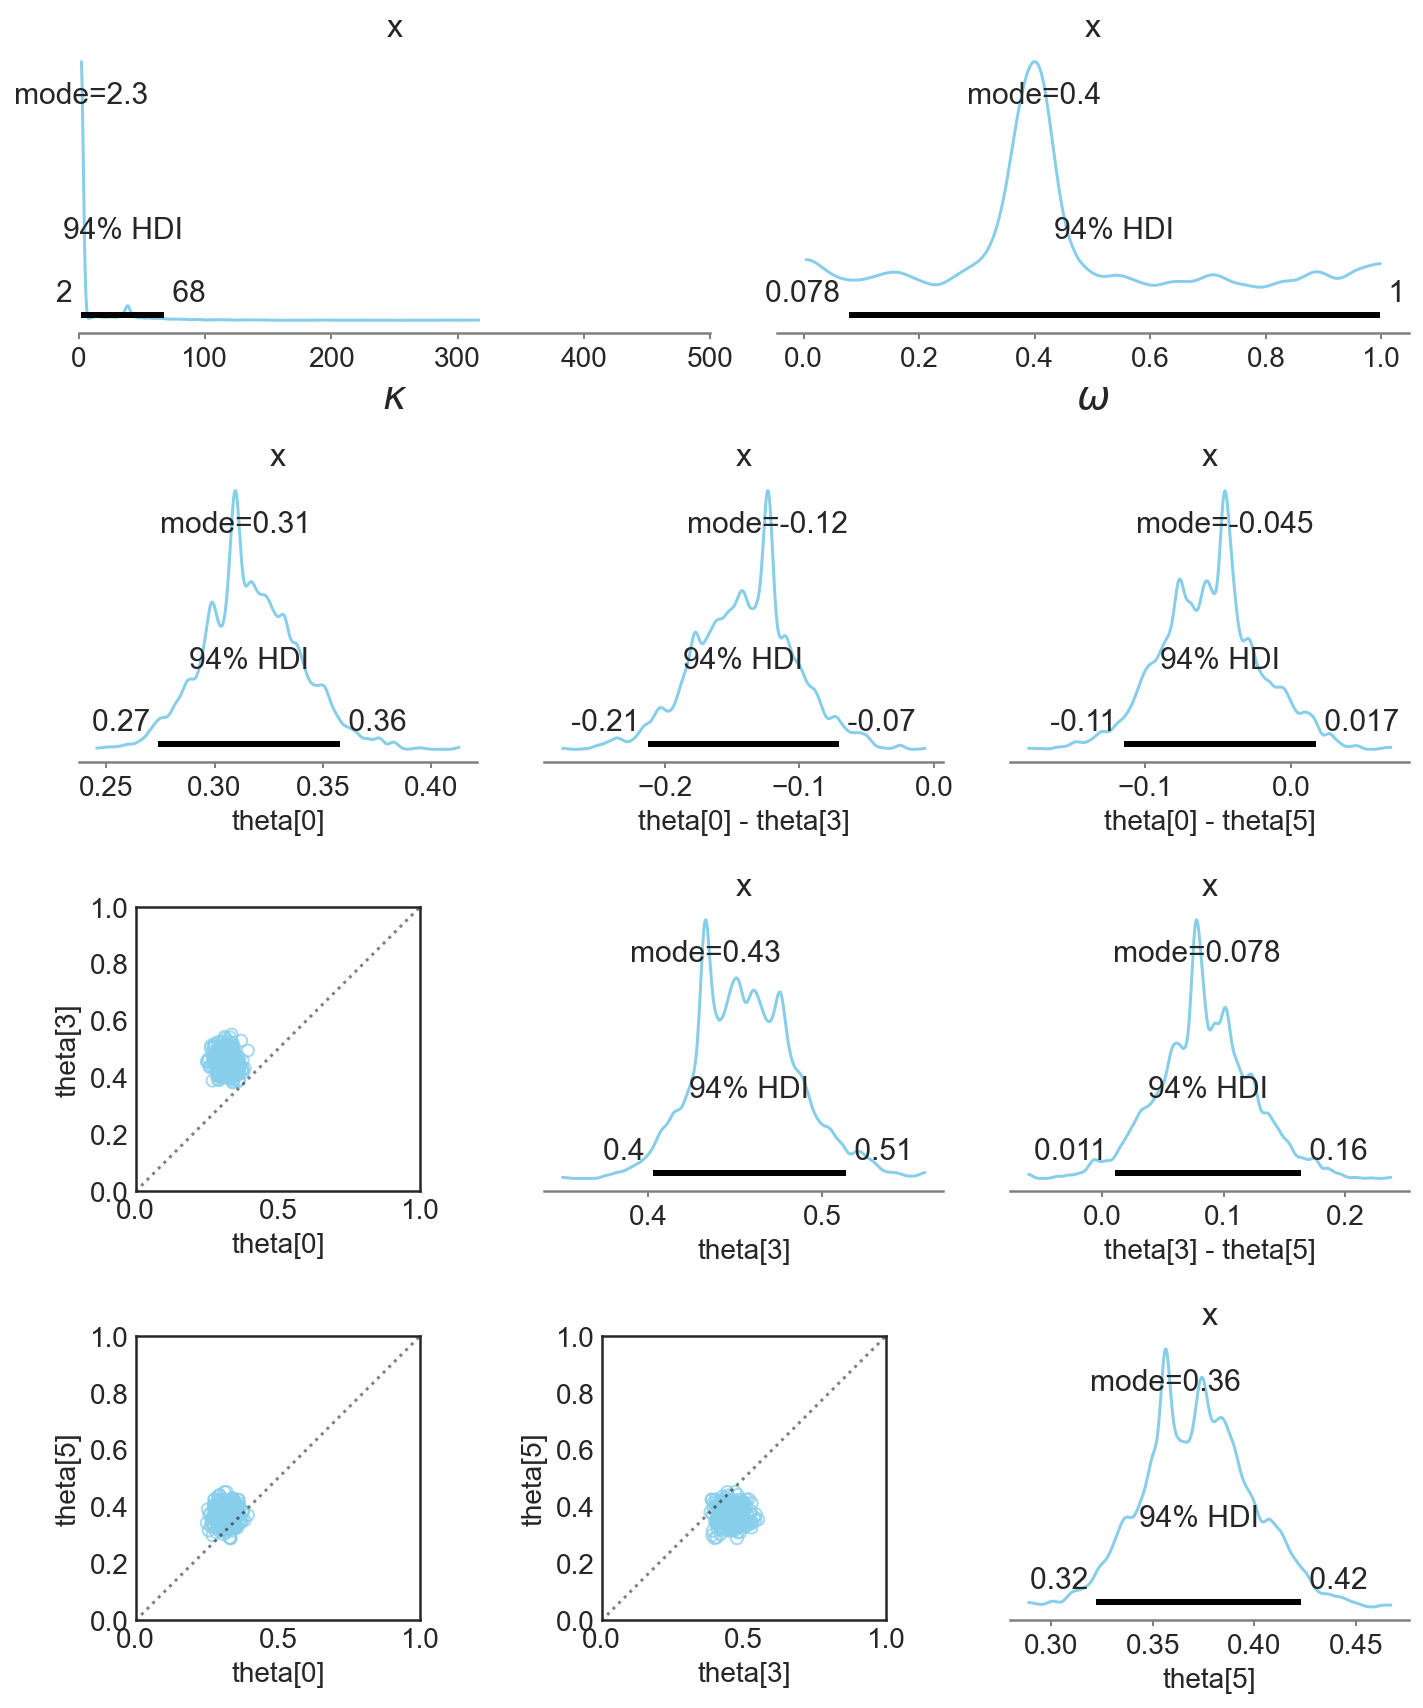

In [23]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import Image
from matplotlib import gridspec

%matplotlib inline

plt.style.use('seaborn-white')
color = '#87ceeb'


plt.figure(figsize=(10,12))

# Define gridspec
gs = gridspec.GridSpec(4, 6)
ax1 = plt.subplot(gs[0,:3])
ax2 = plt.subplot(gs[0,3:])
ax3 = plt.subplot(gs[1,:2])
ax4 = plt.subplot(gs[1,2:4])
ax5 = plt.subplot(gs[1,4:6])
ax6 = plt.subplot(gs[2,:2])                     
ax7 = plt.subplot(gs[2,2:4])
ax8 = plt.subplot(gs[2,4:6])
ax9 = plt.subplot(gs[3,:2])
ax10 = plt.subplot(gs[3,2:4])
ax11 = plt.subplot(gs[3,4:6])

# thetas and theta pairs to plot
thetas = (0, 3, 5)
theta_pairs = ((0,3),(0,5),(3,5))

font_d = {'size':14}

# kappa & omega posterior plots
for var, ax in zip(['kappa', 'omega'], [ax1, ax2]):
    pm.plot_posterior(trace[var], point_estimate='mode', ax=ax, color=color, round_to=2)
    ax.set_xlabel('$\{}$'.format(var), fontdict={'size':20, 'weight':'bold'})
ax1.set(xlim=(0,500))

# theta posterior plots
for var, ax in zip(thetas,[ax3, ax7, ax11]):
    pm.plot_posterior(trace['theta'][:,var], point_estimate='mode', ax=ax, color=color)
    ax.set_xlabel('theta[{}]'.format(var), fontdict=font_d)

# theta scatter plots
for var, ax in zip(theta_pairs,[ax6, ax9, ax10]):
    ax.scatter(trace['theta'][::10,var[0]], trace['theta'][::10,var[1]], alpha=0.75, color=color, facecolor='none')
    ax.plot([0, 1], [0, 1], ':k', transform=ax.transAxes, alpha=0.5)
    ax.set_xlabel('theta[{}]'.format(var[0]), fontdict=font_d)
    ax.set_ylabel('theta[{}]'.format(var[1]), fontdict=font_d)
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal')

# theta posterior differences plots
for var, ax in zip(theta_pairs,[ax4, ax5, ax8]):
    pm.plot_posterior(trace['theta'][:,var[0]]-trace['theta'][:,var[1]], point_estimate='mode', ax=ax, color=color)
    ax.set_xlabel('theta[{}] - theta[{}]'.format(*var), fontdict=font_d)

plt.tight_layout()

## un-pooled model

In [24]:
with pm.Model() as unpooled_model:
    
    theta = pm.Beta('theta', 1, 1, shape=n_practitioners)
        
    y = pm.Bernoulli('y', theta[practitioner_idx], observed=df.use_contraception)

In [25]:
with unpooled_model:
    unpooled_trace = pm.sample(1000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1305 seconds.


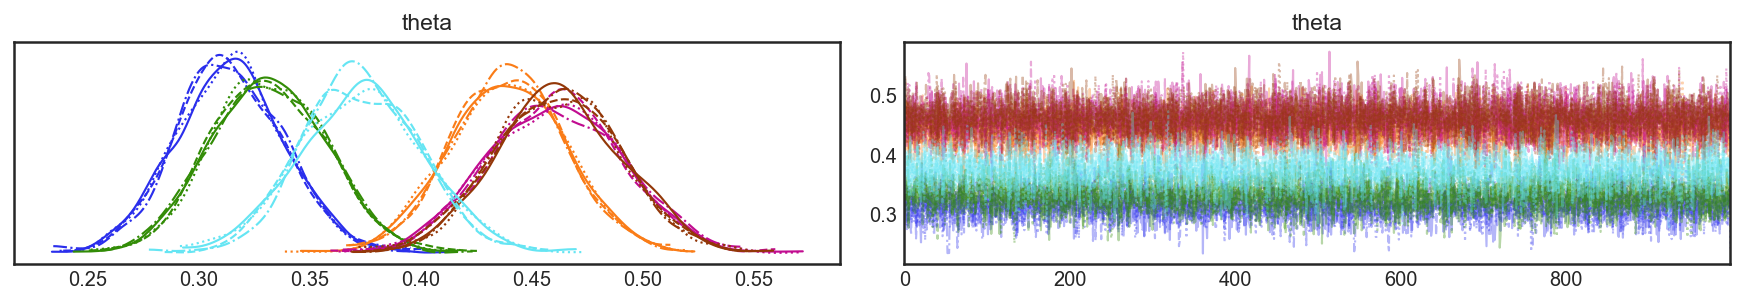

In [26]:
pm.traceplot(unpooled_trace);

In [28]:
df_shrinkage = (pd.concat([pm.summary(unpooled_trace).iloc[:,0],
                           pm.summary(trace).iloc[3:,0]],
                          axis=1)
                .reset_index())
df_shrinkage.columns = ['theta', 'unpooled', 'hierarchical']
df_shrinkage = pd.melt(df_shrinkage, 'theta', ['unpooled', 'hierarchical'], var_name='Model')
df_shrinkage.head()

theta     Model  value
0  theta[0]  unpooled  0.314
1  theta[1]  unpooled  0.439
2  theta[2]  unpooled  0.332
3  theta[3]  unpooled  0.461
4  theta[4]  unpooled  0.462

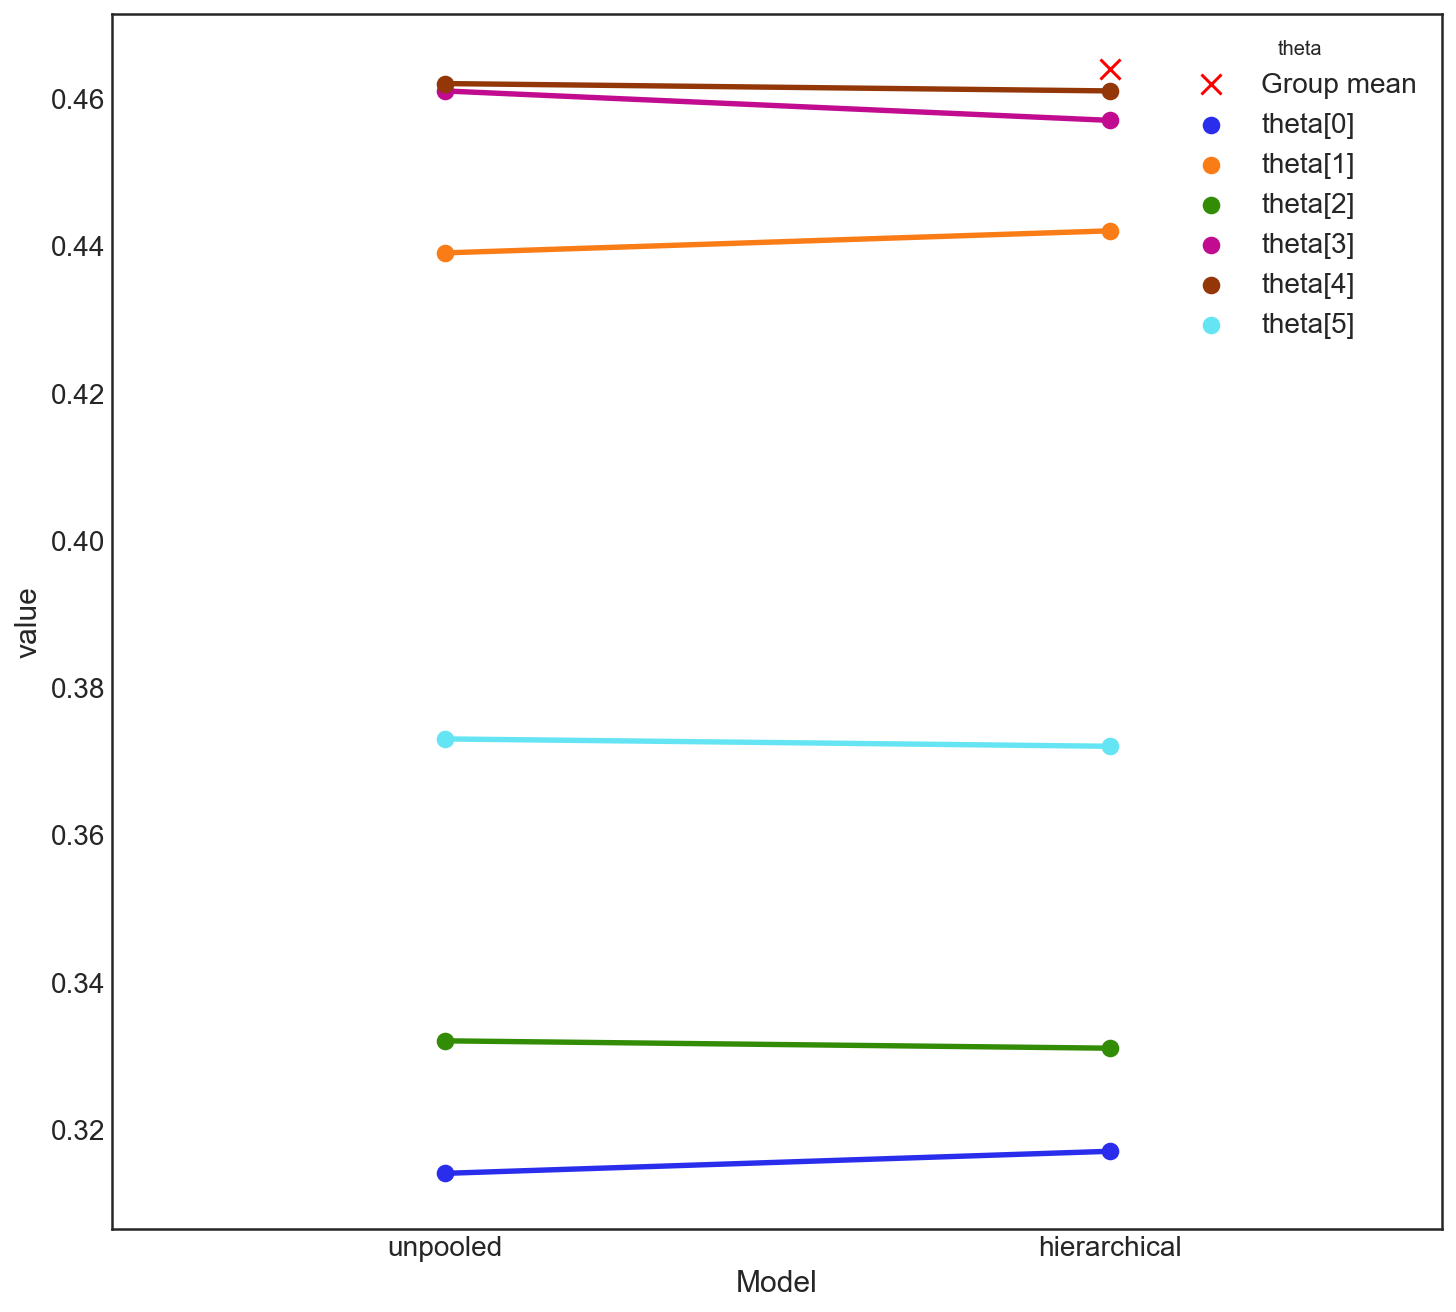

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(1, pm.summary(trace).iloc[0,0], s=100, c='r', marker='x', zorder=999, label='Group mean')
sns.pointplot(x='Model', y='value', hue='theta', data=df_shrinkage);